# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd

In [44]:
import numpy as np

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
!ls

Dataset TWO - Dogs.ipynb
NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx
boro_population.csv
zipcodes-neighborhoods.csv


In [4]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')

In [5]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [6]:
len(df.index)

81937

In [7]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

In [8]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', header=0, nrows= 30000)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is a dog with license registered in NYC. Spayed or Neut is whether the dog is sterilized. Guard or Trained refers whether the dog is registered as a guard dog with DOHMH.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

What is the most common breed New Yorkers keep as their pets\
What percentage of dogs are sterilized\
What is the most common dogs's name in NYC

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: ylabel='Primary Breed'>

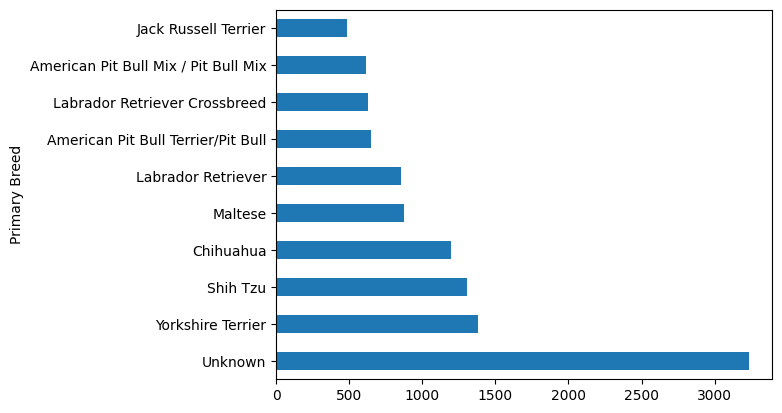

In [22]:
df.groupby('Primary Breed')['Animal Name'].nunique().sort_values(ascending=False).head(10).plot(kind = "barh")

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<Axes: ylabel='Primary Breed'>

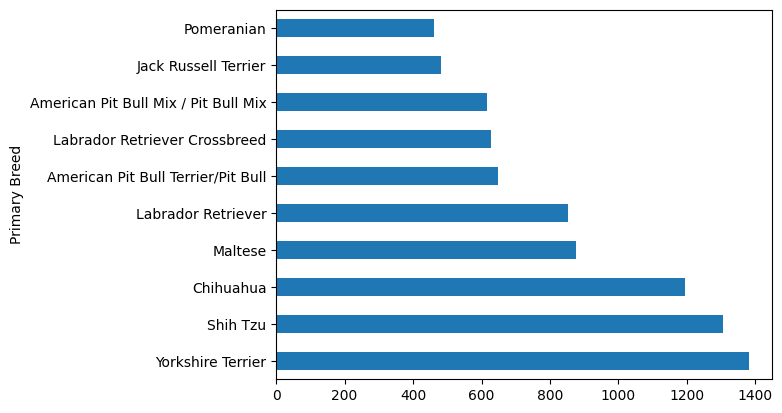

In [24]:
df[df['Primary Breed'] != 'Unknown'].groupby('Primary Breed')['Animal Name'].nunique().sort_values(ascending=False).head(10).plot(kind = "barh")

## What are the most popular dog names?

In [26]:
df.groupby('Animal Name')['Primary Breed'].nunique().sort_values(ascending=False).head()

Animal Name
Charlie    61
Unknown    59
Lucy       58
Max        57
Bella      57
Name: Primary Breed, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [28]:
df[df['Animal Name'] == 'Thomas']

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
12681,11236,Thomas,M,Maltese,NaN,White,NaN,NaN,2010-06-01,Yes,NaN,Yes,2015-06-12 17:46:29.990,2015-06-12,2016-06-12
19531,10028,Thomas,M,Cavalier King Charles Spaniel,NaN,TAN,RUST,NaN,2008-10-01,Yes,No,Yes,2015-07-10 11:41:40.693,2015-06-22,2016-07-26
22120,11231,Thomas,M,Border Terrier,NaN,WHITE,BLACK,NaN,2009-12-01,Yes,No,Yes,2015-07-22 23:26:40.797,2015-07-22,2016-08-07
26598,11249,Thomas,M,Unknown,WOLFHOUND MIX,BLACK,BROWN,NaN,2007-01-01,Yes,No,Yes,2015-08-10 20:11:25.797,2015-08-10,2016-09-09
26753,10023,Thomas,M,Chihuahua,NaN,BLOND,WHITE,NaN,2006-01-01,Yes,No,Yes,2015-08-11 12:09:35.587,2015-08-11,2016-08-18


(Kind of sad that only 5 dogs are named 'Thomas')

In [29]:
len(df[df['Animal Name'] == 'Max'])

202

In [30]:
len(df[df['Animal Name'] == 'Maxwell'])

11

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [32]:
df['Guard or Trained'].value_counts(normalize=True)

Guard or Trained
No     0.999143
Yes    0.000857
Name: proportion, dtype: float64

## What are the actual numbers?

In [33]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [39]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [45]:
df['Guard or Trained'] = df['Guard or Trained'].replace(np.nan, 'No')

In [46]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [52]:
df[df['Guard or Trained'] == 'Yes'].groupby('Primary Breed').size().sort_values(ascending=False).head()

Primary Breed
Unknown                       5
German Shepherd Dog           3
Doberman Pinscher             1
German Shepherd Crossbreed    1
Golden Retriever              1
dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [53]:
df['Year'] = df['Animal Birth'].apply(lambda birth: birth.year)

In [54]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [55]:
df['Age'] = 2016 - df['Year']

In [56]:
df['Age'].mean()

6.712433333333333

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [75]:
df_nei = pd.read_csv('zipcodes-neighborhoods.csv')

In [76]:
df_with_neighborhood = pd.merge(df, df_nei, left_on='Owner Zip Code', right_on='zip', how='left')

In [77]:
df_with_neighborhood.drop(columns='zip', inplace=True)

In [111]:
df_with_neighborhood.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,9,Upper West Side,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,3,Southeast Bronx,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,2,Greenwich Village and Soho,Manhattan
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,8,Upper West Side,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,2,Greenwich Village and Soho,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [68]:
df[df_with_neighborhood['borough']== 'Bronx'].groupby('Animal Name').size().sort_values(ascending=False).head()

Animal Name
Bella       22
Max         21
Rocky       20
Unknown     16
Princess    15
dtype: int64

In [69]:
df[df_with_neighborhood['borough']== 'Brooklyn'].groupby('Animal Name').size().sort_values(ascending=False).head()

Animal Name
Unknown    97
Max        46
unknown    45
UNKNOWN    45
Bella      45
dtype: int64

In [70]:
df[df_with_neighborhood['neighborhood']== 'Upper East Side'].groupby('Animal Name').size().sort_values(ascending=False).head()

Animal Name
Charlie    19
Bella      12
NO NAME    11
Lola       10
Lucy       10
dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [80]:
most_popular_breeds = df_with_neighborhood[df_with_neighborhood['Primary Breed'] != 'Unknown'].groupby(['neighborhood', 'Primary Breed']).size().reset_index(name='Count')

In [81]:
most_popular_breeds_in_neighborhood = most_popular_breeds.loc[most_popular_breeds.groupby('neighborhood')['Count'].idxmax()]
most_popular_breeds_in_neighborhood

,neighborhood,Primary Breed,Count
97,Borough Park,Yorkshire Terrier,49
158,Bronx Park and Fordham,Yorkshire Terrier,39
259,Bushwick and Williamsburg,Yorkshire Terrier,47
340,Canarsie and Flatlands,Shih Tzu,56
403,Central Bronx,Yorkshire Terrier,29
505,Central Brooklyn,Shih Tzu,52
549,Central Harlem,Chihuahua,48
675,Central Queens,Yorkshire Terrier,34
713,Chelsea and Clinton,Chihuahua,80
897,East Harlem,Yorkshire Terrier,44


## What breed of dogs are the least likely to be spayed? Male or female?

In [88]:
spayed_counts = df_with_neighborhood.groupby('Primary Breed')['Spayed or Neut'].apply(
    lambda x: (x == 'No').sum()).reset_index(name='Not Spayed Count')
total_counts = df_with_neighborhood.groupby('Primary Breed').size().reset_index(name='Total Count')

breed_spayed_info = pd.merge(spayed_counts, total_counts, on='Primary Breed')

breed_spayed_info['Not Spayed Ratio'] = breed_spayed_info['Not Spayed Count'] / breed_spayed_info['Total Count']

breed_spayed_info = breed_spayed_info.sort_values(by='Not Spayed Ratio', ascending=False)

least_likely_spayed_breed = breed_spayed_info.head(1)

least_likely_spayed_breed

,Primary Breed,Not Spayed Count,Total Count,Not Spayed Ratio
54,Canaan Dog,1,1,1.0


In [92]:
gender_spayed_counts = df_with_neighborhood.groupby('Animal Gender')['Spayed or Neut'].apply(
    lambda x: (x == 'Yes').sum()).reset_index(name='Spayed Count')
gender_total_counts = df_with_neighborhood.groupby('Animal Gender').size().reset_index(name='Total Count')

gender_spayed_info = pd.merge(gender_spayed_counts, gender_total_counts, on='Animal Gender')

gender_spayed_info['Spayed Ratio'] = gender_spayed_info['Spayed Count'] / gender_spayed_info['Total Count']

gender_spayed_info = gender_spayed_info.sort_values(by='Spayed Ratio', ascending=False)

gender_spayed_info

,Animal Gender,Spayed Count,Total Count,Spayed Ratio
0,,3,3,1.000000
1,F,11786,13739,0.857850
2,M,12874,16258,0.791856


## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [115]:
def is_monochrome_case_insensitive(row):
    monochrome_colors = {'BLACK', 'WHITE', 'GREY', 'GRAY'}
    colors = {str(row['Animal Dominant Color']).upper(), str(row['Animal Secondary Color']).upper(), str(row['Animal Third Color']).upper()}
    # Remove 'NAN' (converted from NaN) from the set of colors
    colors.discard('NAN')
    # Check if all colors are in the set of monochrome colors
    return all(color in monochrome_colors for color in colors)

# Apply the case-insensitive function to create the new column
df_with_neighborhood['monochrome'] = df_with_neighborhood.apply(is_monochrome_case_insensitive, axis=1)

df_with_neighborhood.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,borough,monochrome
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,9,Upper West Side,Manhattan,False
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,3,Southeast Bronx,Bronx,False
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,2,Greenwich Village and Soho,Manhattan,False
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,8,Upper West Side,Manhattan,False
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,2,Greenwich Village and Soho,Manhattan,True


## How many dogs are in each borough? Plot it in a graph.

In [113]:
df_with_neighborhood.drop(columns='monochrome', inplace=True)

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [117]:
df_pop = pd.read_csv('boro_population.csv')
df_pop.head(5)

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [118]:
merged_df = df_with_neighborhood.merge(df_pop, on='borough')

In [119]:
dogs_per_capita = merged_df.groupby('borough').apply(lambda x: len(x) / x['population'].iloc[0])
dogs_per_capita.idxmax(), dogs_per_capita.max()

('Manhattan', 0.006371471762546837)

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

<Figure size 1000x600 with 0 Axes>

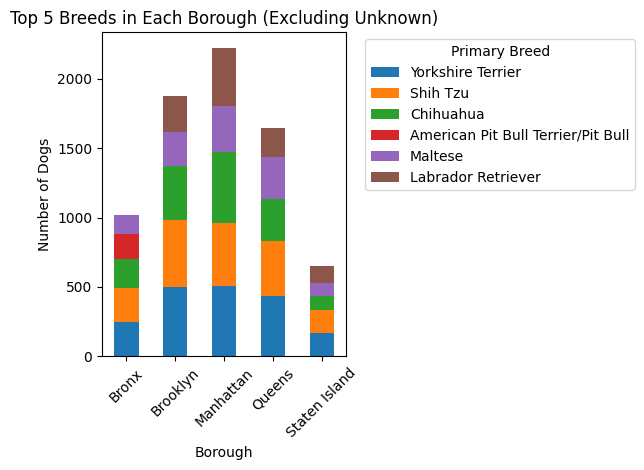

In [122]:
top_breeds_per_borough_excluding_unknown = df_with_neighborhood[df_with_neighborhood['Primary Breed'] != 'Unknown'].groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(5)

plt.figure(figsize=(10, 6))
top_breeds_per_borough_excluding_unknown.unstack().plot(kind='bar', stacked=True)
plt.title('Top 5 Breeds in Each Borough (Excluding Unknown)')
plt.ylabel('Number of Dogs')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.legend(title='Primary Breed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## What percentage of dogs are not guard dogs?

In [123]:
(df_with_neighborhood['Guard or Trained'] == 'No').mean() * 100

99.94333333333333